In [28]:
cd drive/MyDrive/

/content/drive/MyDrive


In [29]:
!git clone https://github.com/Katerine-Chanci/Supplementary-information-AFM-micrographs-analysis.git

Cloning into 'Supplementary-information-AFM-micrographs-analysis'...
remote: Enumerating objects: 3, done.
remote: Counting objects: 100% (3/3), done.
remote: Compressing objects: 100% (2/2), done.
remote: Total 3 (delta 0), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (3/3), done.


**Physical behavior of the KR-12 peptide on solid surfaces and Langmuir-Blodgett lipid films as complementary approaches to study its antimicrobial action mode against S. aureus**

**Supplementary information: AFM micrographs analysis**

K. Chanci<sup>1</sup>, J. Diosa<sup>2</sup>, M. A. Giraldo<sup>1</sup>, M. Mesa<sup>2</sup>*

<sup>1</sup>Biophysics Group, Institute of Physics, University of Antioquia

<sup>2</sup>Materials Science Group, Institute of Chemistry, University of Antioquia 

Calle 70 #52-21, AA 1226, Medellín, Colombia 


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [16]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import cv2                        #OpenCV library

**Fig. 2a**

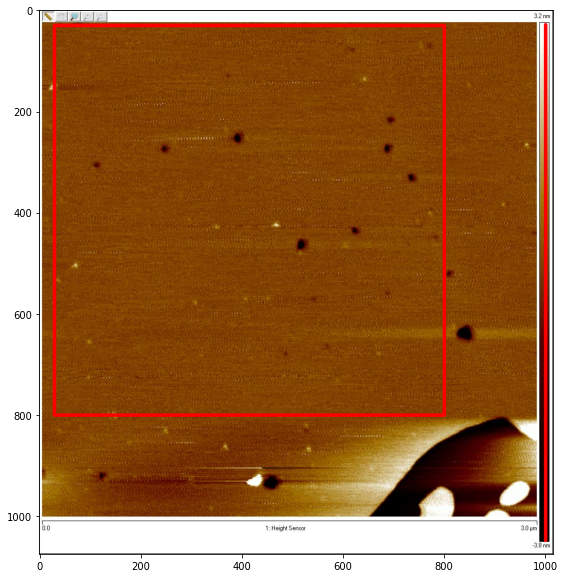

In [4]:
#Read the image

img = cv2.imread('drive/MyDrive/PGPGCL_H2O_004.jpg')
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)

#Cut the image

cv2.rectangle(img,(30,30),(800,800),(255,0,0),5);       #Red square 
cv2.rectangle(img,(1000,28),(1000,1048),(255,0,0),5);   #Red line 
plt.figure(figsize=(10,10))
plt.imshow(img)


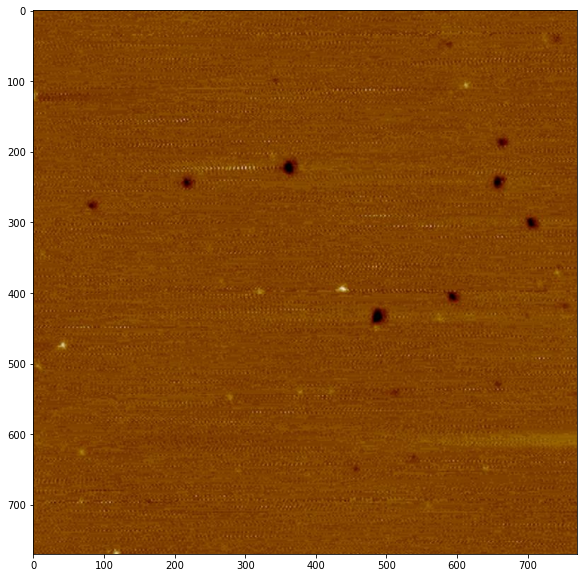

In [6]:
#Rename the red square and the red line

bilayerImg = img[30:800,30:800]      #Red square (bilayer)
scaleImg = img[28:1048,1000]         #Red line (height scale)
plt.figure(figsize=(10,10))
plt.imshow(bilayerImg)

In [ ]:
bilayerImg.shape #Shape of the red square in pixels

(770, 770, 3)

In [ ]:
#Mean RGB color of the red square

promRGB = np.mean(bilayerImg, axis=(0,1))
promRGB = [int(i) for i in promRGB]
promRGB

[130, 67, 2]

In [7]:
#Check the values of the red line
#for i in scaleImg:
#    print(i)

In [ ]:
#Compare the RGB color of each pixel in the red square with the RGB color of 
#each pixel in the red line 

c = 0
for i in scaleImg:
    c += 1
    if np.sum(abs(i - np.array(promRGB))) < 7:
        print('Match',c)                        #Match with the more similar 
                                                #color in the height scale

Match 461
Match 462
Match 463
Match 464
Match 465
Match 466
Match 467
Match 468
Match 469
Match 470
Match 471
Match 472
Match 473


467 is the index of the mean height

In [22]:
#Mean height of the bilayer

Bilayer_h = 3.2 + 3.8  #Height of the AFM micrograph
Match = 467            #Index of the mean height
Scale_pixls = 1020     #Amount of pixels in the red line 
Top_h = 3.2            #The highest point in the AFM micrograph

h = (Match*Bilayer_h)/Scale_pixls
Real_h = Top_h-h
print(Real_h)


-0.004901960784313708


On average the lipidic bilayer was uniform

**Fig. 2b**

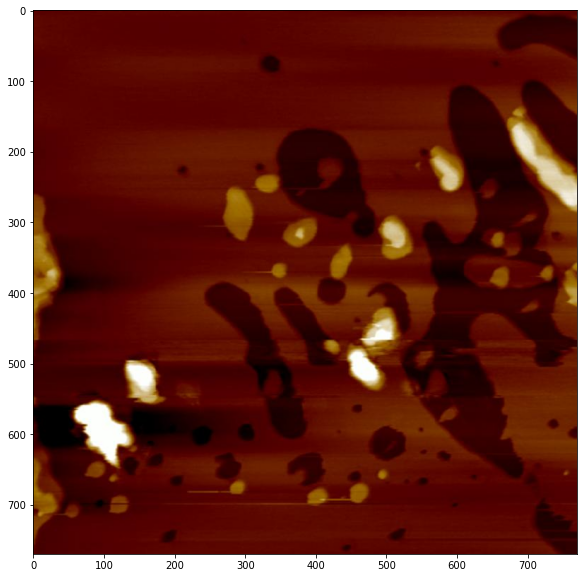

In [10]:
#Read the image 

img2 = cv2.imread('drive/MyDrive/PGPGCL_H2O_AMP_007_KR.jpg')
img2 = cv2.cvtColor(img2,cv2.COLOR_BGR2RGB)

#Cut the image

bilayerImg = img2[30:800,30:800]
scaleImg = img2[28:1048,1000]
plt.figure(figsize=(10,10))
plt.imshow(bilayerImg)

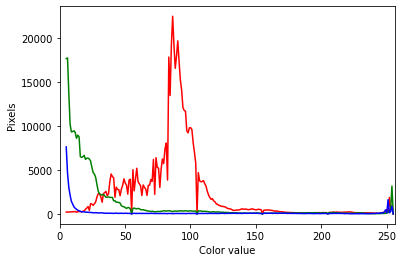

In [11]:
# Create the histogram plot, with three lines, one for each color

colors = ("r", "g", "b")
channel_ids = (0, 1, 2)

plt.xlim([0, 256])
for channel_id, c in zip(channel_ids, colors):
    histogram, bin_edges = np.histogram(
        bilayerImg[:, :, channel_id], bins=256, range=(5, 256)
    )
    plt.plot(bin_edges[0:-1], histogram, color=c)

plt.xlabel("Color value")
plt.ylabel("Pixels")

plt.show()

In [12]:
#Mean RGB color of the bilayer after 30 mins of interaction with the KR-12 AMP

promRGB = np.mean(bilayerImg, axis=(0,1))
promRGB = [int(i) for i in promRGB]
promRGB

[86, 16, 5]

In [ ]:
#Compare the RGB color of each pixel in the bilayer image with the RGB color of 
#each pixel in the height scale 

c = 0
meann = []
for i in scaleImg:
    c += 1
    if np.sum(abs(i - np.array(promRGB))) < 22:
      print('Match',c)                            #Match with the more similar 
                                                  #color in the height scale
      meann.append(c)

Match 581
Match 582
Match 583
Match 584
Match 585
Match 586
Match 587
Match 588
Match 589
Match 590
Match 591
Match 592
Match 593
Match 594
Match 630
Match 631
Match 632
Match 633


In [ ]:
np.mean(meann) #Index of the mean height

597.2777777777778

In [21]:
#Mean height of the bilayer after 30 mins of interaction with the peptide

Bilayer_h = 14.6 + 9.7  #Height of the AFM micrograph
Match = 597             #Index of the mean height
Scale_pixls = 1020      #Amount of pixels in the red line 
Top_h = 14.6            #The highest point in the AFM micrograph

h = (Match*Bilayer_h)/Scale_pixls
Real_h = Top_h-h
print(Real_h)



0.377352941176472


In [14]:
#Segmentation process

pixel_values = bilayerImg.reshape((-1, 3)) #Reshape the image

pixel_values = np.float32(pixel_values)    #Convert to float
#pixel_values.shape
#pixel_values

#Segmentation criteria
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)  

k = 4
_, labels, (centers) = cv2.kmeans(pixel_values, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS) 

#Convert back to 8 bit values
centers = np.uint8(centers) 

#Flatten the labels array
labels = labels.flatten() 

centers #Mean RGB color of each cluster

array([[231, 221, 191],
       [144,  88,  11],
       [ 46,   0,   0],
       [ 91,  10,   0]], dtype=uint8)

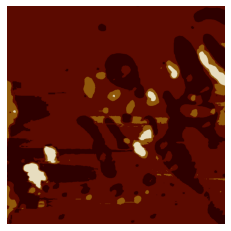

In [15]:
#labels 
#labels.shape

segmented_image = centers[labels.flatten()]
#segmented_image 

#Reshape back to the original image dimension
segmented_image = segmented_image.reshape(bilayerImg.shape)

#Show the image
fig = plt.figure()
plt.imshow(segmented_image)
plt.axis('off')
fig.savefig('supp_Fig_1aa.png',dpi =1200)



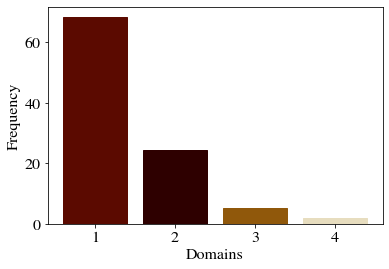

In [18]:
#Frequency plot of each cluster

pd.Series(labels).value_counts()/labels.shape[0]*100

propor = pd.Series(labels).value_counts()/labels.shape[0]*100

plt.rcParams.update({'font.size': 16, 'font.family': 'STIXGeneral', 'mathtext.fontset': 'stix'})

fig = plt.figure()
bar = plt.bar(['1','2','3','4'],propor.values)
bar[0].set_color((91/255,10/255,0))
bar[1].set_color((46/255,0,0))
bar[2].set_color((144/255,88/255,11/255))
bar[3].set_color((231/255,221/255,191/255))
plt.ylabel('Frequency')
plt.xlabel('Domains')
fig.savefig('supp_Fig_1b.png',dpi =1200)

In [ ]:
centers #Mean RGB color of each cluster

array([[231, 221, 191],
       [144,  88,  11],
       [ 46,   0,   0],
       [ 91,  10,   0]], dtype=uint8)

In [ ]:
#The brightest domain

c = 0
meann = []
for i in scaleImg:
    c += 1
    if np.sum(abs(i - np.array(centers[0]))) < 9:
      print('Match',c)
      meann.append(c)

Match 101
Match 102
Match 103


In [23]:
#Mean height of the brightest domain

Bilayer_h = 14.6 + 9.7  #Height of the AFM micrograph
Match = 102             #Index of the mean height
Scale_pixls = 1020      #Amount of pixels in the red line 
Top_h = 14.6            #The highest point in the AFM micrograph

h = (Match*Bilayer_h)/Scale_pixls
Real_h = Top_h-h
print(Real_h)

12.17


In [ ]:
#The bright domain

c = 0
meann = []
for i in scaleImg:
    c += 1
    if np.sum(abs(i - np.array(centers[1]))) < 35:
      print('Match',c)
      meann.append(c)

Match 370
Match 371
Match 372


In [24]:
#Mean height of the bright domain

Bilayer_h = 14.6 + 9.7  #Height of the AFM micrograph
Match = 371             #Index of the mean height
Scale_pixls = 1020      #Amount of pixels in the red line 
Top_h = 14.6            #The highest point in the AFM micrograph

h = (Match*Bilayer_h)/Scale_pixls
Real_h = Top_h-h
print(Real_h)

5.761470588235294


In [ ]:
#The dark domain

c = 0
meann = []
for i in scaleImg:
    c += 1
    if np.sum(abs(i - np.array(centers[2]))) < 7:
      print('Match',c)
      meann.append(c)

Match 767
Match 768
Match 769
Match 770
Match 771
Match 772


In [25]:
#Mean height of the dark domain

Bilayer_h = 14.6 + 9.7  #Height of the AFM micrograph
Match = 770             #Index of the mean height
Scale_pixls = 1020      #Amount of pixels in the red line 
Top_h = 14.6            #The highest point in the AFM micrograph

h = (Match*Bilayer_h)/Scale_pixls
Real_h = Top_h-h
print(Real_h)

-3.74411764705882


In [ ]:
#The background domain

c = 0
meann = []
for i in scaleImg:
    c += 1
    if np.sum(abs(i - np.array(centers[3]))) < 7:
      print('Match',c)
      meann.append(c)

Match 590
Match 591
Match 592


In [26]:
#Mean height of the background domain

Bilayer_h = 14.6 + 9.7  #Height of the AFM micrograph
Match = 591             #Index of the mean height
Scale_pixls = 1020      #Amount of pixels in the red line 
Top_h = 14.6            #The highest point in the AFM micrograph

h = (Match*Bilayer_h)/Scale_pixls
Real_h = Top_h-h
print(Real_h)

0.5202941176470617
